In [22]:
from bot import get_historical_data
import pandas as pd
from binance.client import Client
import matplotlib.pyplot as plt

In [3]:
transaction_costs = 0.0005

# Start investment is EURO!

In [4]:
# Fetch Bitcoin prices at 5-minute intervals for the last 40 days
symbol = 'BTCEUR'
interval = Client.KLINE_INTERVAL_1HOUR
days = 5000

bitcoin_data = get_historical_data(symbol, interval, days)

In [5]:
bitcoin_data.shape

(39981, 12)

In [6]:
bitcoin_data["pct"] = bitcoin_data["Close"].pct_change().shift(-1)    #time shift ist WICHTIG! einer der häufigsten Fehler, wenn er vergessen wird

In [7]:
bitcoin_data.dropna(inplace=True)

In [8]:
bitcoin_data.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,pct
0,2020-01-03 09:00:00+01:00,6244.33,6506.73,6244.33,6506.73,0.310455,2020-01-03 09:59:59.999000072+01:00,2005.126436,13,0.120004,776.814624,0,0.006899
1,2020-01-03 10:00:00+01:00,6548.22,6551.62,6548.22,6551.62,0.050000,2020-01-03 10:59:59.999000072+01:00,327.482250,2,0.050000,327.482250,0,0.002108
2,2020-01-03 11:00:00+01:00,6565.43,6565.43,6565.38,6565.43,0.101456,2020-01-03 11:59:59.999000072+01:00,666.101759,3,0.010133,66.526996,0,0.002458
3,2020-01-03 12:00:00+01:00,6565.43,6607.39,6535.82,6581.57,2.079176,2020-01-03 12:59:59.999000072+01:00,13671.415750,56,1.089576,7184.545758,0,0.000000
4,2020-01-03 13:00:00+01:00,6581.57,6581.57,6581.57,6581.57,0.000000,2020-01-03 13:59:59.999000072+01:00,0.000000,0,0.000000,0.000000,0,0.000000


In [9]:
bitcoin_data["MOM"] = bitcoin_data["Close"] / bitcoin_data["Close"].shift(30)

In [18]:
#BUY_FILTER = (bitcoin_data["pct"] > 0).shift(1) == True
BUY_FILTER = bitcoin_data["Open time"].dt.day_of_week== 0

In [ ]:
bitcoin_data.loc[BUY_FILTER, "pct"]

<Axes: >

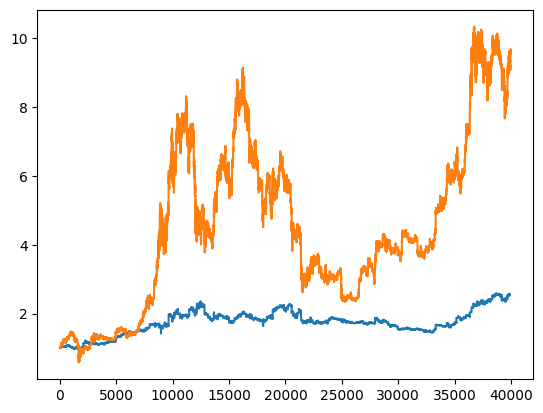

In [19]:
(1 + bitcoin_data.loc[BUY_FILTER, "pct"]).cumprod().plot()
(1 + bitcoin_data.loc[:, "pct"]).cumprod().plot()

In [23]:
def sharpe_ratio(s: pd.Series):
    sharpe = s.mean() / s.std()
    return sharpe

In [24]:
sharpe_ratio(bitcoin_data.loc[BUY_FILTER, "pct"])

np.float64(0.025404401819828275)

In [25]:
sharpe_ratio(bitcoin_data.loc[:, "pct"])

np.float64(0.011564617617700633)